# EDA for movie box-office capstone project #
#### Amin Khoeini

***

__Goal of this projet :__

To perdict the box-office of a movie based on the rating on the popular website. Data are gathered from these website:

- IMDB
- Rotten Tomato
- Metacritic

These data has a diffrent features as below :

- IMDB categorize to :

    * 1 - Total vote.
    * 2 - USA voter.
    * 3 - Non-USA voter.
    * 4 - Female voter.
    * 5 - Male voter.
    
    
- Rotten Tomato categorize to :
    * 1 - Tomato meter rating, which is a reating given by critic.
    * 2 - Tomato audience rating.


- Metacritic, which has a single value.



__The dependnat value__ here is the movie box-office gross that this project tries to make a model to predict it.It has a three diffrent value of Domestic,International and Lifetime which is the sum of the first two.







### 1: General Information about dataset: 

__Loading the data and import packages__

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as pltc
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler




In [181]:
movie = pd.read_csv('/Users/Amin/Documents/GitHub/Movie_boxoffice_reviews/data/processed/movie_db_fianl1.csv')
movie['metacritic'] = (movie.tomatometer_count/np.max(movie.tomatometer_count)) * movie.Metascore

In [182]:
movie.head(3)

,Unnamed: 0,Title,Alternative Title,director,Year,date_published,Worldwide_Lifetime_Gross,Domestic_Lifetime_Gross,Foreign_Lifetime_Gross,tomatometer_rating,...,imdb_us_voters_rating,imdb_us_voters_votes,imdb_non_us_voters_rating,imdb_non_us_voters_votes,imdb_females_avg_vote,imdb_females_votes,imdb_males_avg_vote,imdb_males_votes,Metascore,metacritic
0,0,The Mountain Between Us,Il domani tra di noi,Hany Abu-Assad,2017,2017-11-23,62832209,30348555,32483654,38,...,64,7520,63,27997,67,13462,63,35093,48,14.299652
1,1,Rampage,Rampage: Furia animale,Brad Peyton,2018,2018-04-12,428028233,101028233,327000000,51,...,61,17163,60,54731,64,13702,60,84286,45,21.559233
2,2,Valerian and the City of a Thousand Planets,Valerian e la citt��_��_ dei mille pianeti,Luc Besson,2017,2017-09-21,225973340,41189488,184783852,48,...,63,17690,64,69287,64,18118,65,99701,51,26.121951


#### There are some columns that are not related to modeling and we can saftly drop them from the dataset. ( such as title,director,etc.)

In [183]:
### the information about the movies are not valuable for the modeling so we drop those columns###

movie.drop(columns=['Unnamed: 0','Title','Alternative Title','director','Year','date_published','Metascore'],inplace=True)






#### Now use the describe and info method to make sure all the data is in accepted range, and there is no null value in the dataset.







In [184]:
movie.describe()

,Worldwide_Lifetime_Gross,Domestic_Lifetime_Gross,Foreign_Lifetime_Gross,tomatometer_rating,tomatometer_count,tomato_audience_rating,tomato_audience_vote_count,imdb_avg_vote,imdb_total_votes,imdb_us_voters_rating,imdb_us_voters_votes,imdb_non_us_voters_rating,imdb_non_us_voters_votes,imdb_females_avg_vote,imdb_females_votes,imdb_males_avg_vote,imdb_males_votes,metacritic
count,3.313000e+03,3.313000e+03,3.313000e+03,3313.000000,3313.000000,3313.000000,3.313000e+03,3313.000000,3.313000e+03,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3.313000e+03,3313.000000
mean,6.944168e+07,2.682753e+07,4.266184e+07,58.799879,109.610625,55.894054,2.940364e+04,62.361304,6.593907e+04,62.518563,8611.364926,61.521280,29088.284334,63.620284,10216.152128,61.777241,4.054825e+04,11.661781
std,1.844350e+08,6.700632e+07,1.225375e+08,27.732092,95.925884,20.344006,7.853103e+04,8.998801,1.331014e+05,9.087124,16265.694860,9.149205,55198.591935,8.876132,19722.771885,9.179661,8.164633e+04,12.366500
min,1.770000e+02,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000e+00,20.000000,1.000000e+02,15.000000,2.000000,19.000000,25.000000,15.000000,9.000000,20.000000,5.800000e+01,0.008711
25%,2.042320e+05,8.733000e+03,6.666700e+04,37.000000,30.000000,41.000000,4.060000e+02,57.000000,3.253000e+03,57.000000,511.000000,56.000000,1490.000000,58.000000,478.000000,56.000000,1.956000e+03,2.644599
50%,3.211985e+06,3.845510e+05,1.476843e+06,63.000000,80.000000,56.000000,3.970000e+03,63.000000,1.473800e+04,63.000000,2191.000000,62.000000,6928.000000,64.000000,2448.000000,62.000000,8.810000e+03,7.243902
75%,4.727572e+07,2.234824e+07,2.078800e+07,83.000000,167.000000,72.000000,2.500000e+04,68.000000,6.603500e+04,69.000000,9252.000000,68.000000,31165.000000,70.000000,10470.000000,68.000000,3.978000e+04,16.527875
max,2.797501e+09,9.366622e+08,1.939128e+09,100.000000,574.000000,100.000000,2.374219e+06,88.000000,2.002816e+06,94.000000,246718.000000,87.000000,799420.000000,92.000000,278964.000000,88.000000,1.202678e+06,82.566202


In [185]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Worldwide_Lifetime_Gross    3313 non-null   int64  
 1   Domestic_Lifetime_Gross     3313 non-null   int64  
 2   Foreign_Lifetime_Gross      3313 non-null   int64  
 3   tomatometer_rating          3313 non-null   int64  
 4   tomatometer_count           3313 non-null   int64  
 5   tomato_audience_rating      3313 non-null   int64  
 6   tomato_audience_vote_count  3313 non-null   int64  
 7   imdb_avg_vote               3313 non-null   int64  
 8   imdb_total_votes            3313 non-null   int64  
 9   imdb_us_voters_rating       3313 non-null   int64  
 10  imdb_us_voters_votes        3313 non-null   int64  
 11  imdb_non_us_voters_rating   3313 non-null   int64  
 12  imdb_non_us_voters_votes    3313 non-null   int64  
 13  imdb_females_avg_vote       3313 

#### Seems all the data are clean and have a proper type. 


### 2.Dependant Value : box-office gross
***

let's take a look at the three columns that represent the box-office information for the movies.

In [147]:
movie['Worldwide_Lifetime_Gross'].value_counts(sort=True)

532950503    2
20746        2
24487        2
336166       2
320814       2
            ..
2177678      1
60048        1
5659286      1
96922        1
403455       1
Name: Worldwide_Lifetime_Gross, Length: 3293, dtype: int64

In [148]:
movie['Domestic_Lifetime_Gross'].value_counts(sort=True)

0            634
33817          2
6900335        2
202348         2
1373           2
            ... 
652385625      1
42330          1
89435          1
85468508       1
15433          1
Name: Domestic_Lifetime_Gross, Length: 2665, dtype: int64

In [149]:
movie['Foreign_Lifetime_Gross'].value_counts(sort=True)

0            464
1000000        2
349312609      2
68900000       2
114138         2
            ... 
49524059       1
53552476       1
11971933       1
22300000       1
13883391       1
Name: Foreign_Lifetime_Gross, Length: 2836, dtype: int64

It is obvious that __Domestic gross__ and __Foreign gross__ have lots of the row with zero value. The Worldwide alltime is a sum of these two number and has value for all of the rows. So for the sake of these project let's focus on __Worldwide Lifetime__ as the dependant value and drop the other two.

In [186]:
movie.drop(columns=['Domestic_Lifetime_Gross','Foreign_Lifetime_Gross'],inplace=True)

__Take a quick look at the dependant value.__

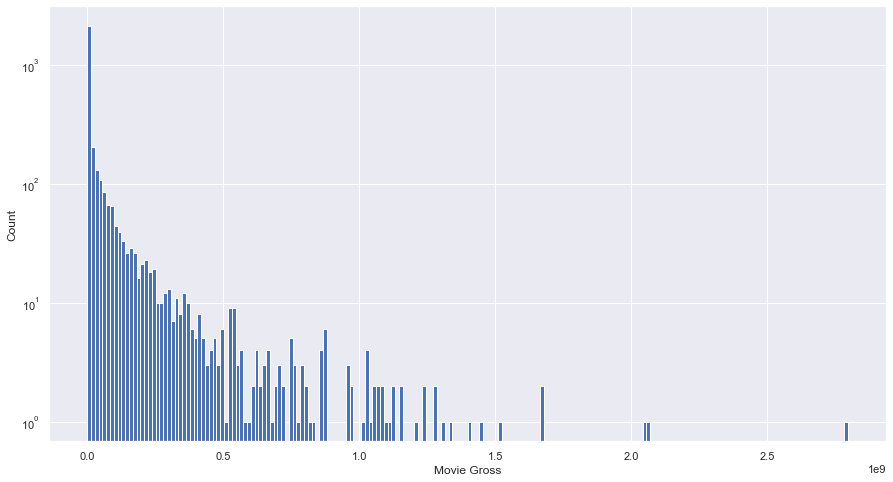

In [187]:
fig,ax = plt.subplots()
fig.set_size_inches(15, 8)
_ = ax.hist(movie.Worldwide_Lifetime_Gross,bins=200,label='movie gross')
_ = ax.set_yscale('log')
_ = ax.set_ylabel('Count')
_ = ax.set_xlabel('Movie Gross')

#### The Lifetime gross has a large range of value. Let's make a loose 3 category to better visualize the distribution of this data.


- Blockbuster : Movie with gross more than 500 million dollars.
- Average : Movie with the gross between 500 million and 10 million dollars.
- Indie : Movie with the gross less than 10 million dollars.


In [188]:
def conditions(df):
    if (df.Worldwide_Lifetime_Gross > 500000000):
        return 'Blockbuster'
    elif ( df.Worldwide_Lifetime_Gross < 10000000):
        return 'Indie'
    else:
        return 'Average'

movie['class'] = movie.apply(conditions, axis=1) 

Now let's see the __distrubution of the class__ throughout the data.

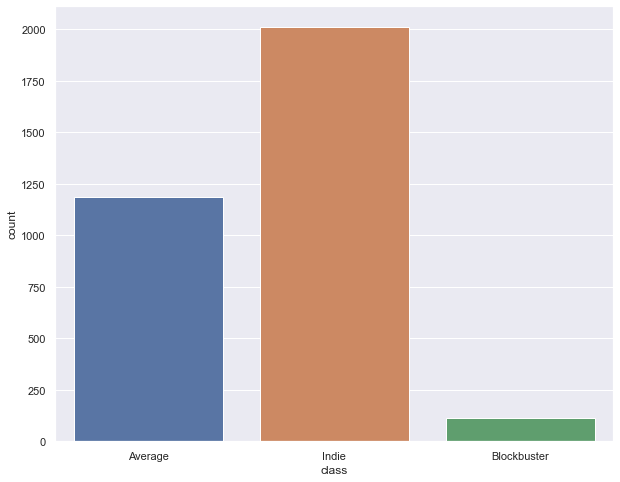

In [189]:
sns.set(rc={'figure.figsize':(10,8)})
_ = sns.countplot(x='class',data=movie)

Seems most of the data belong to the Indie class with box-office gross of 2,000,000 dollars or less.

To see the __relationship__ between the __dependant value__ and all the __predictor variable__ ,let's make a scatterplot and use the class for better visualazation.

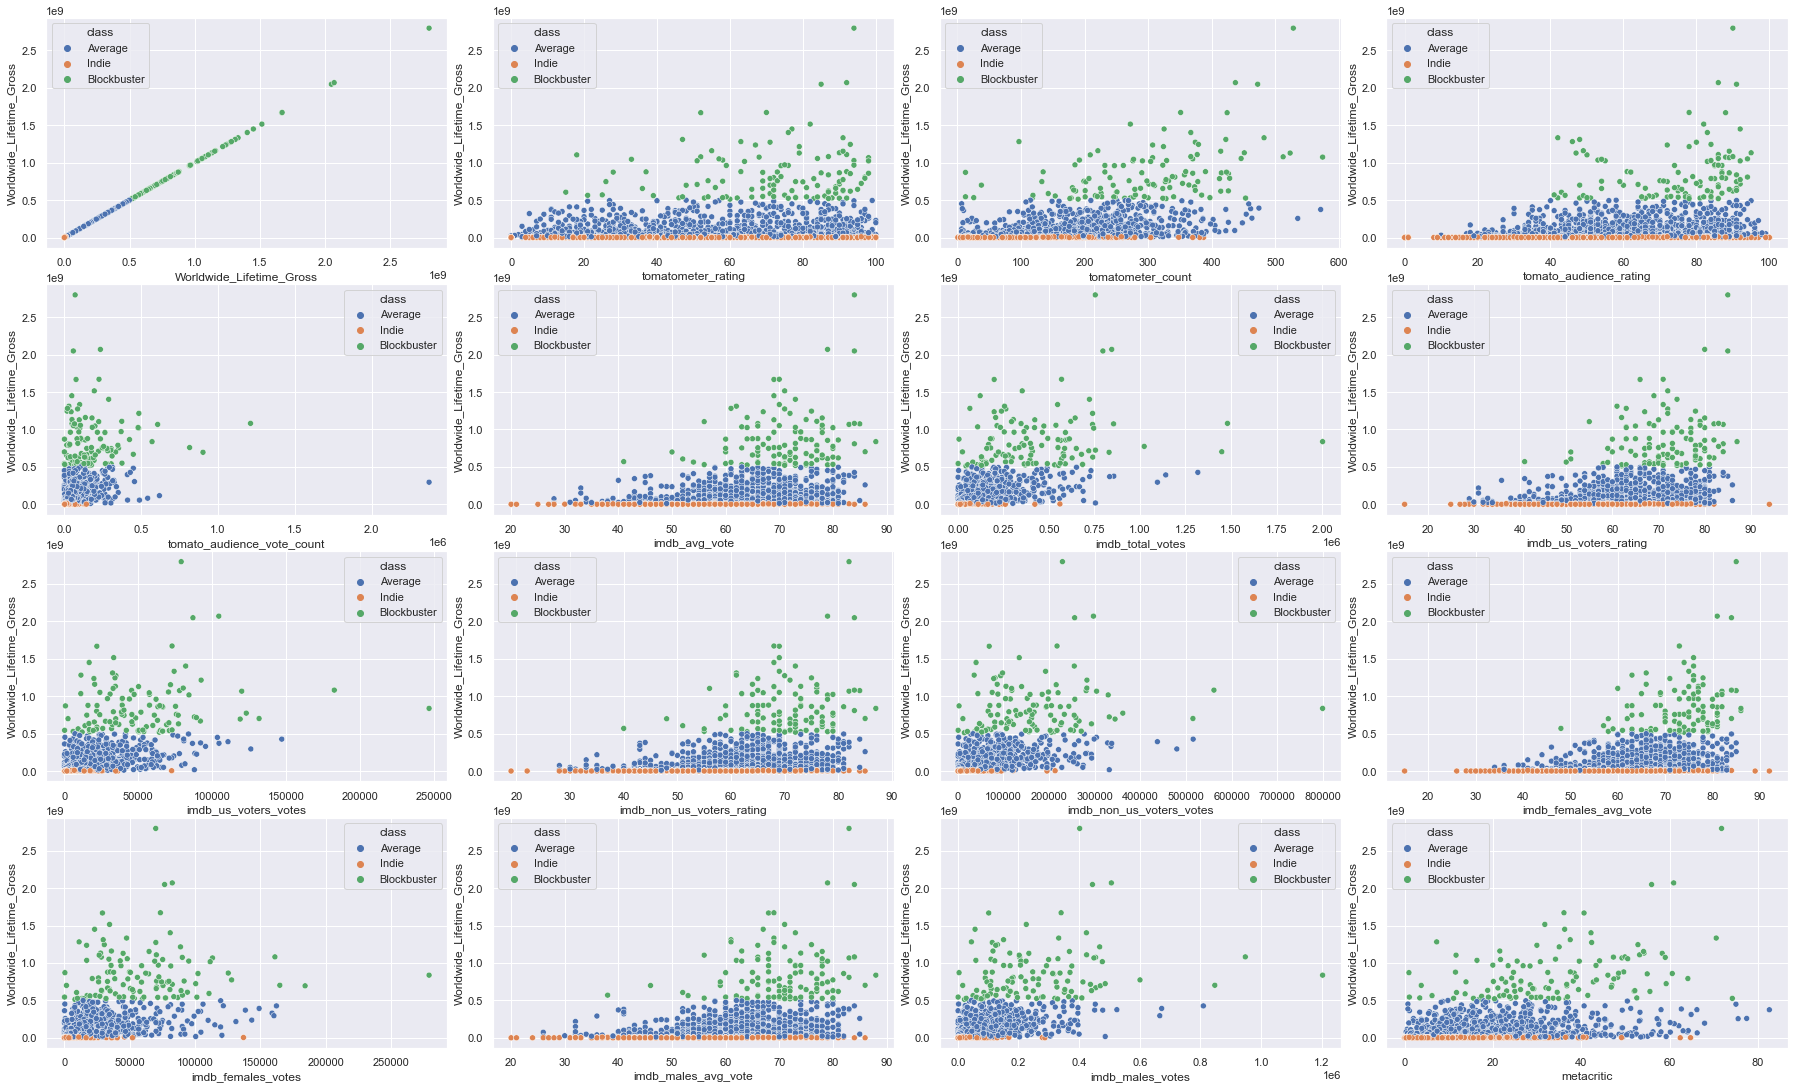

In [190]:
col = movie.columns
col.drop('class')
fig, axes = plt.subplots(4,4, figsize=(25,15))
fig.tight_layout()
for i, ax in zip(col, axes.flat):
         _ = sns.scatterplot(ax=ax,x=i,y= 'Worldwide_Lifetime_Gross',data=movie,hue='class')

This figures shows most of the __votes count__ columns has a __positive and linear__ connection with __the movie gross__ variable. But we don't see this pattern with the average vote values columns in the dataset.

### 3. Predictor variable

***

First let's check the distribution of the __average vote__ for the diffrent source and see how each class contributes.

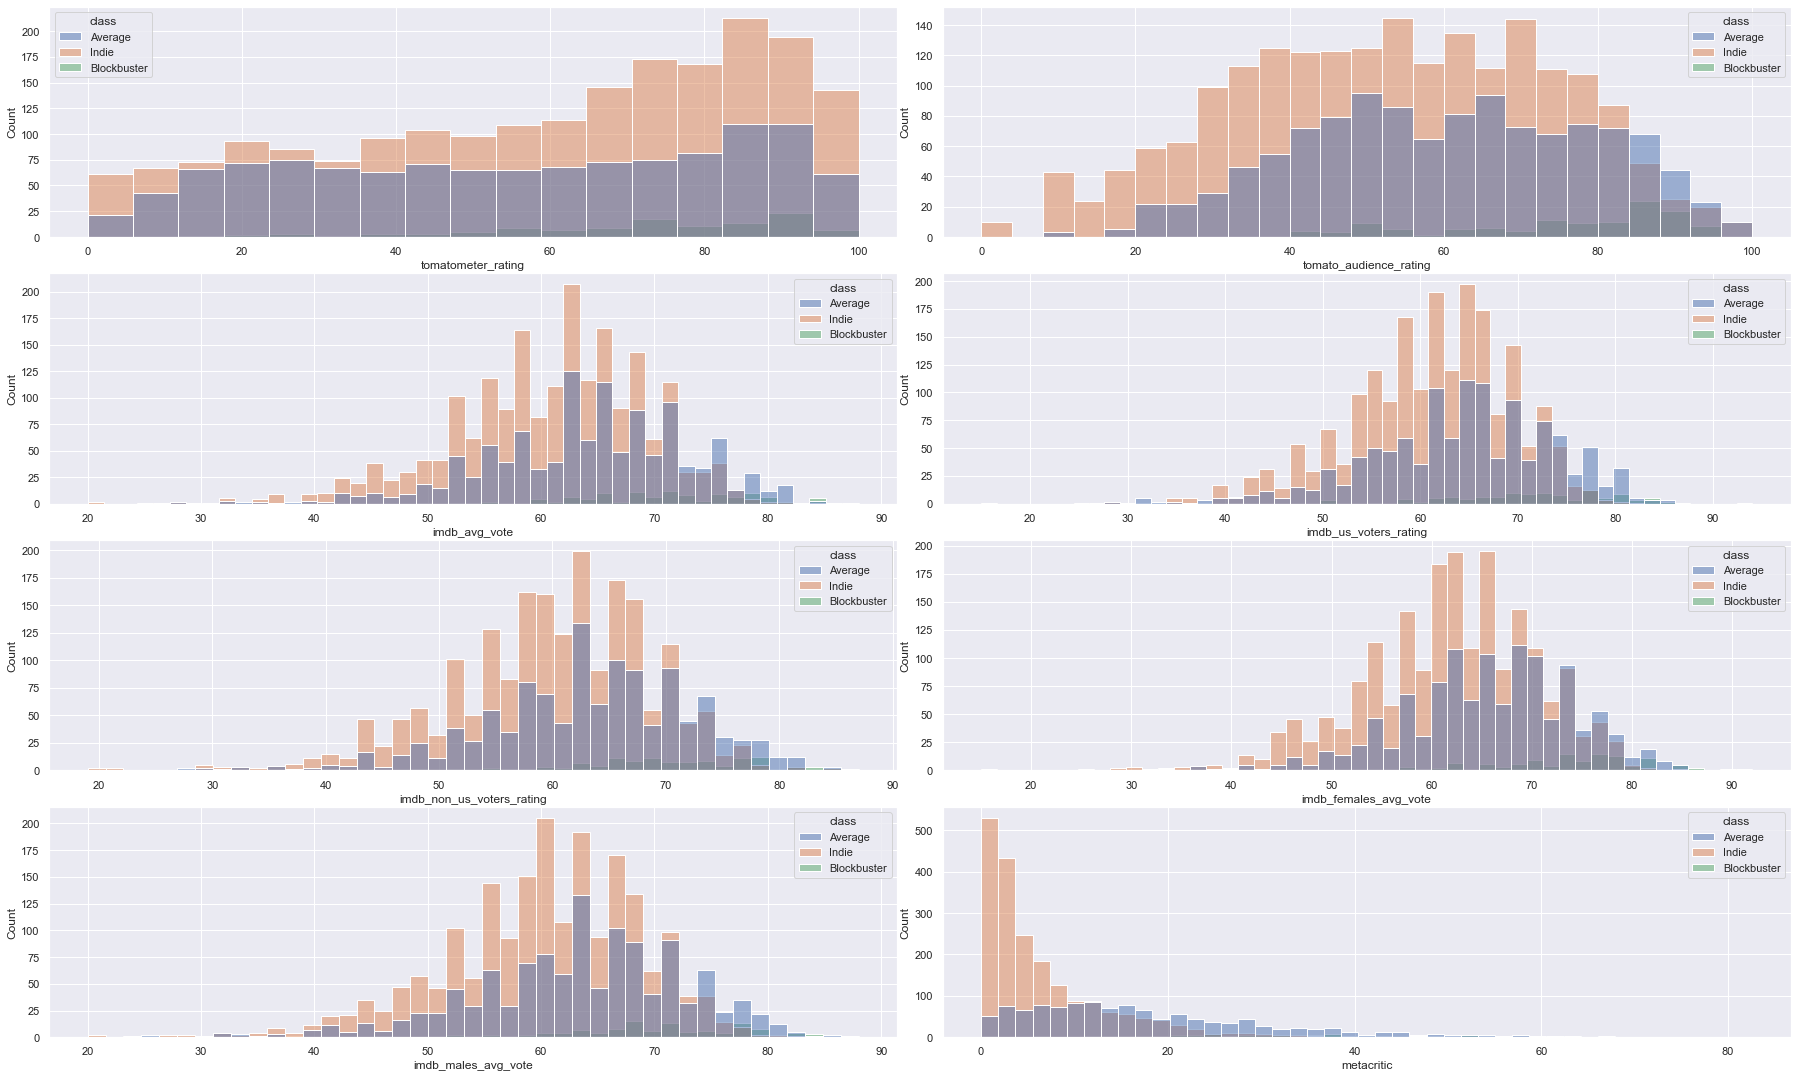

In [191]:
columns = movie[['tomatometer_rating','tomato_audience_rating','imdb_avg_vote','imdb_us_voters_rating','imdb_non_us_voters_rating','imdb_females_avg_vote','imdb_males_avg_vote','metacritic']].columns
fig, axes = plt.subplots(4,2, figsize=(25,15))
fig.tight_layout()
for i, ax in zip(columns, axes.flat):
         _ = sns.histplot(ax=ax,x=i,data=movie,hue='class')

While the distribution of average vote for __Indie and Avarage__ movies are __widespread__, __Blockbuster__ tends to have a __higher than average__ vote ( 70 and higher).

__Metacretic__ shows a very __diffrent distribution__ shape in compare to others. While others are all somehome have a normalized distribution, Metacritic has a left tail and most of the value for the average vote are below the 50.

Now we can make a __scaterplot of average vote with the number of vote__ for each data and see thier pattern.

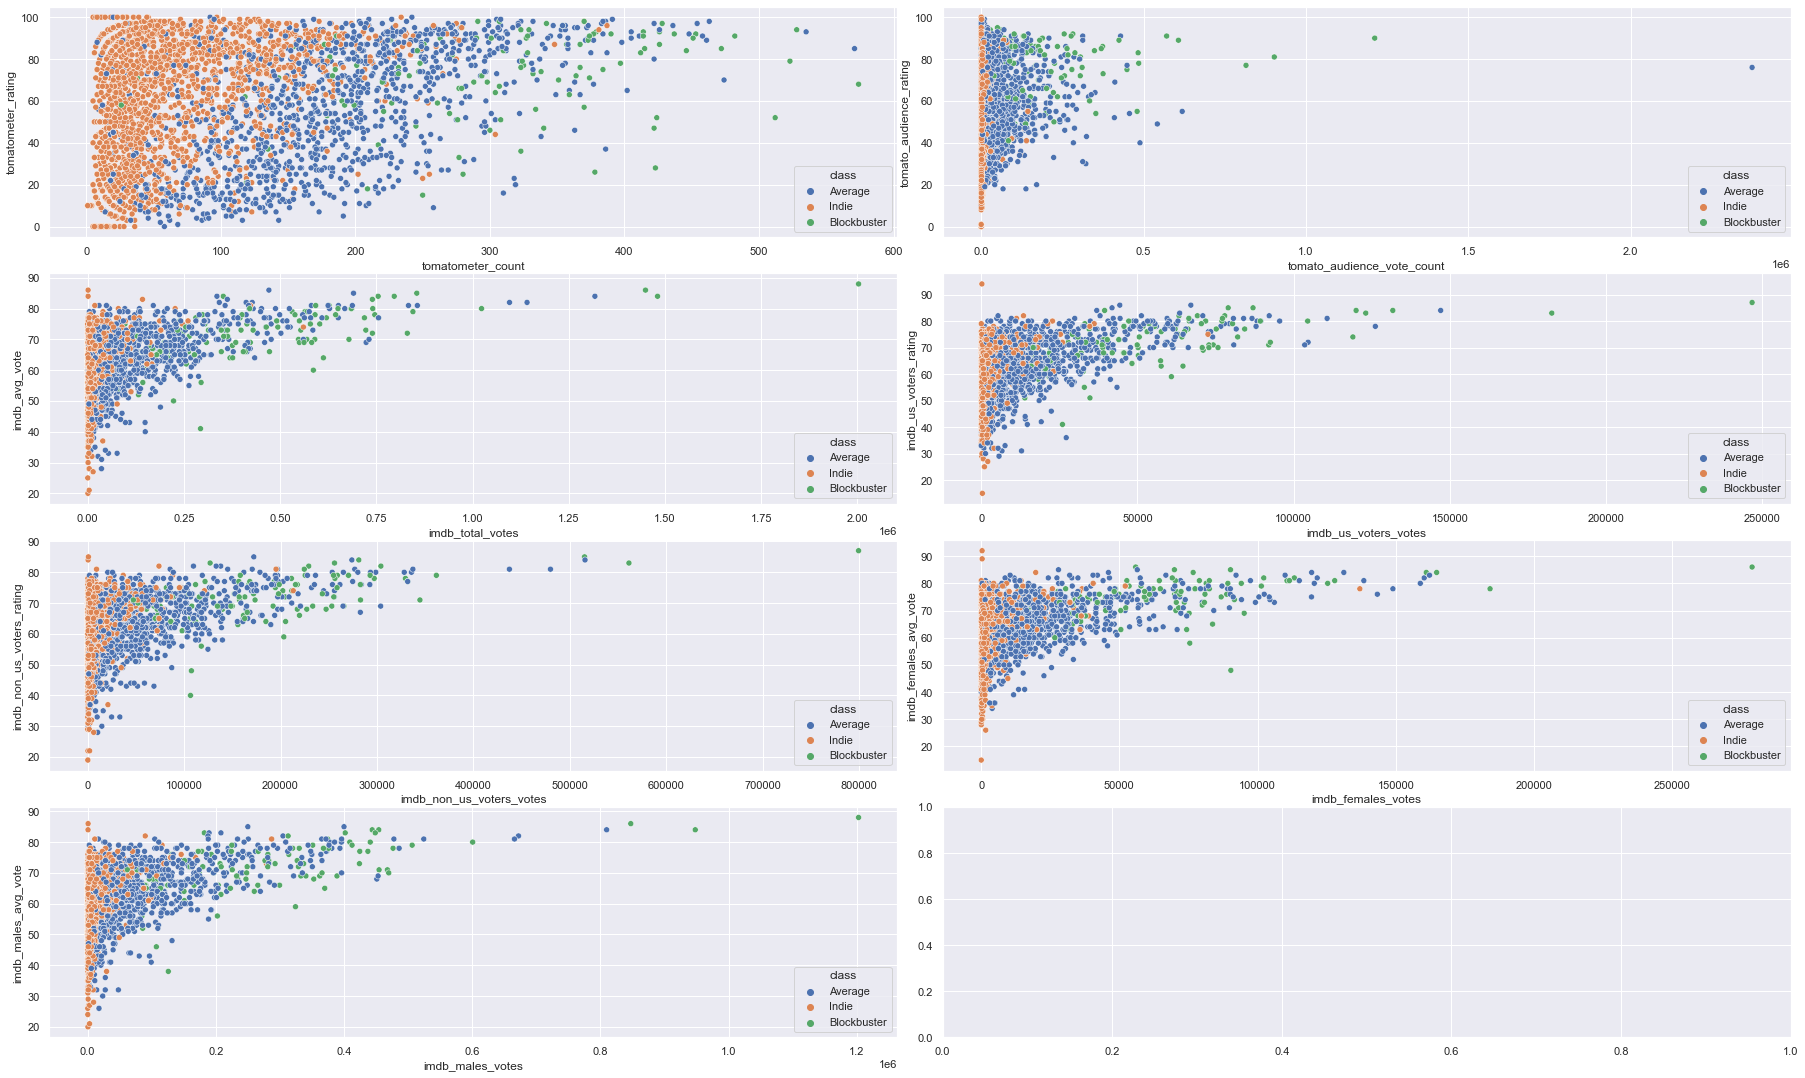

In [219]:
fig, axes = plt.subplots(4,2, figsize=(25,15))
fig.tight_layout()
_ = sns.scatterplot(ax=axes[0,0],y='tomatometer_rating',x= 'tomatometer_count',data=movie,hue='class')
_ = sns.scatterplot(ax=axes[0,1],y='tomato_audience_rating',x= 'tomato_audience_vote_count',data=movie,hue='class')
_ = sns.scatterplot(ax=axes[1,0],y='imdb_avg_vote',x= 'imdb_total_votes',data=movie,hue='class')
_ = sns.scatterplot(ax=axes[1,1],y='imdb_us_voters_rating',x= 'imdb_us_voters_votes',data=movie,hue='class')
_ = sns.scatterplot(ax=axes[2,0],y='imdb_non_us_voters_rating',x= 'imdb_non_us_voters_votes',data=movie,hue='class')
_ = sns.scatterplot(ax=axes[2,1],y='imdb_females_avg_vote',x= 'imdb_females_votes',data=movie,hue='class')
_ = sns.scatterplot(ax=axes[3,0],y='imdb_males_avg_vote',x= 'imdb_males_votes',data=movie,hue='class')

As we expected __Indie__ movies are less popular, they have less number of vote in all the cases, but they have all the range of the average vote from very low to almost 100. __Blockbuster__ on the other hands have very high number of votes and the average vote of 70 or higher.

Another __interesting observation__ from this plot is in __tomatomatter vote vs tomatomatter count__. This is the only data collecting from the critic rather than normal movie viewer. Here we see that __critic tends to give a high number for Indie films__ and there is a lot high number for them, in compare to normal viewer which only gives a high number to popular Blockboster movie and Inide film has very low number of high vote average.

#### Dimensionality reduction in the dataset:
To see how __diffrent predictor variable relate to eachother__ and which one is better to chose for final model, let's do the __Principal component analysis__ for these variable. doing this, we can eliminate redundant features and make a optimal model for the box-office prediction.

- First let's chose the predictor value and scale them for PCA.

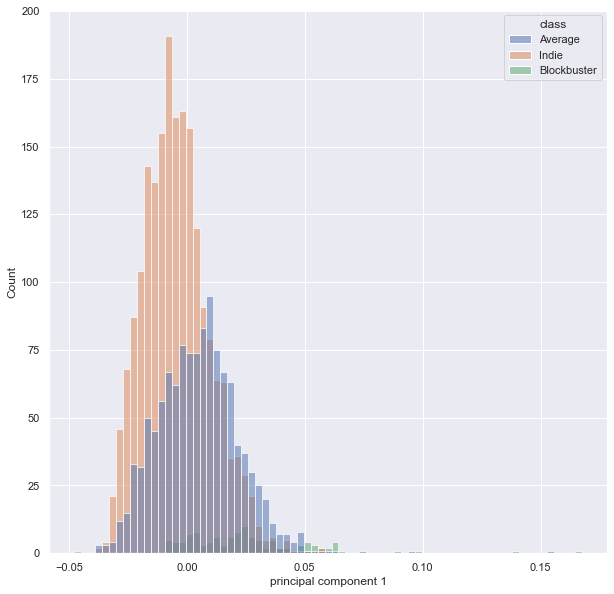

In [269]:
movie1 = movie.drop(columns=['Worldwide_Lifetime_Gross','class'])
columns_scale = movie1.columns
movie_scale = scale(movie1)
movie_scale_df = pd.DataFrame(movie_scale, columns=(columns_scale))
movie_scale_df = movie_scale_df.T
movie_PCA = PCA(n_components=2).fit(movie_scale_df)
principalDf = pd.DataFrame({'principal component 1':movie_PCA.components_[0],'principal component 2':movie_PCA.components_[1]})
principalDf.head()          
finalDf = pd.concat([principalDf, movie[['class']]], axis = 1)
finalDf.head()

_ = sns.histplot(x='principal component 1',data=finalDf,hue='class')

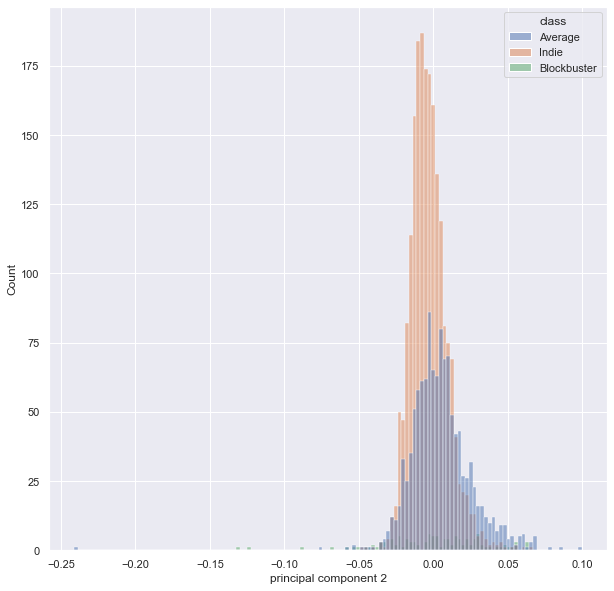

In [298]:
_ = sns.histplot(x='principal component 2',data=finalDf,hue='class')

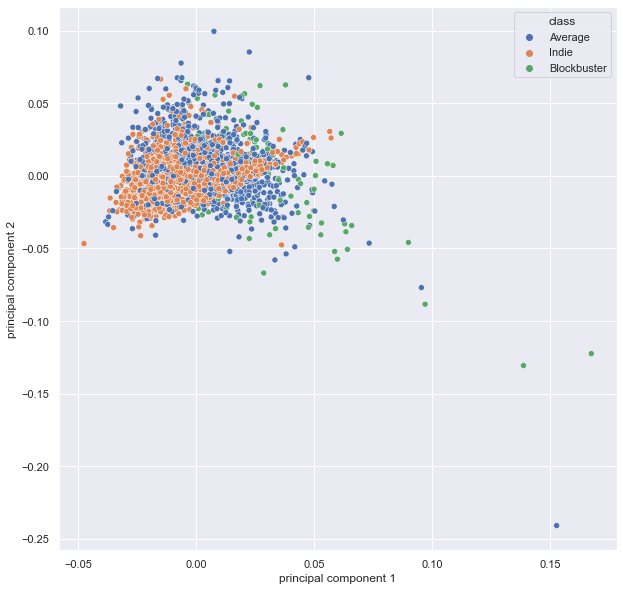

In [270]:
_ = sns.scatterplot(x='principal component 1',y='principal component 2',data=finalDf,hue='class')

- Fit the scaled data to PCA.

In [271]:
movie1 = movie.drop(columns=['Worldwide_Lifetime_Gross','class'])
movie_scale = scale(movie1)
columns_scale = movie1.columns
movie_scale_df = pd.DataFrame(movie_scale, columns=(columns_scale))
movie_scale_df.head()

,tomatometer_rating,tomatometer_count,tomato_audience_rating,tomato_audience_vote_count,imdb_avg_vote,imdb_total_votes,imdb_us_voters_rating,imdb_us_voters_votes,imdb_non_us_voters_rating,imdb_non_us_voters_votes,imdb_females_avg_vote,imdb_females_votes,imdb_males_avg_vote,imdb_males_votes,metacritic
0,-0.750142,0.640063,-0.437249,-0.214516,0.182129,-0.009288,0.163051,-0.067106,0.161647,-0.019773,0.380822,0.164598,0.133223,-0.066826,0.213340
1,-0.281301,1.724397,0.742638,-0.250775,-0.151299,0.540466,-0.167137,0.525826,-0.166300,0.464624,0.042786,0.176769,-0.193636,0.535779,0.800465
2,-0.389495,1.922497,-0.142277,-0.020474,0.293272,0.688458,0.052988,0.558230,0.270963,0.728366,0.042786,0.400706,0.351129,0.724609,1.169478
3,-0.245236,-0.903027,-0.683059,-0.372529,-0.373584,-0.481526,-0.387262,-0.508347,-0.384931,-0.513538,-0.295250,-0.505033,-0.411541,-0.482964,-0.810289
4,1.197354,2.923421,1.529229,1.003110,1.293556,3.216989,1.483800,3.013768,1.254803,2.589546,1.394930,2.011068,1.331705,2.964680,3.068229


In [272]:
movie_PCA = PCA().fit(movie_scale_df)


- Plot the cumulative variance ratio with number of components.

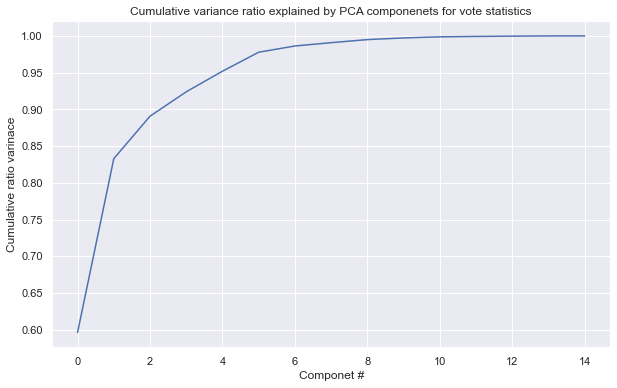

In [273]:
plt.subplots(figsize=(10, 6))
plt.plot(movie_PCA.explained_variance_ratio_.cumsum());
plt.xlabel('Componet #')
plt.ylabel('Cumulative ratio varinace')
plt.title('Cumulative variance ratio explained by PCA componenets for vote statistics');


The first __two components__ seem to account for __85%__ of the variance.

- let's plot first two components and annotates the varible name too see how they are related to eachothers.

In [277]:
loadings = movie_PCA.components_
num_pc = movie_PCA.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = movie1.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
variable,,,,,,,,,,,,,,,
tomatometer_rating,0.180878,-0.287875,-0.180869,0.769886,-0.382119,0.253123,0.097344,0.149968,-0.029106,0.125237,0.010293,-0.002911,-0.010586,0.012273,0.003566
tomatometer_count,0.252774,0.115882,-0.603386,-0.155310,0.294808,0.043531,0.016366,0.126246,0.080630,0.648800,-0.003733,0.036924,-0.016094,0.019300,0.004028
tomato_audience_rating,0.223374,-0.237051,0.056768,0.332211,0.335206,-0.798053,-0.066684,-0.079291,0.139571,-0.009818,-0.000187,-0.010531,0.020686,-0.014955,0.000382
tomato_audience_vote_count,0.179373,0.284489,0.338187,0.355599,0.675983,0.425040,-0.034449,-0.023181,-0.013000,-0.050939,0.054746,0.030066,0.004400,-0.004173,0.005698
imdb_avg_vote,0.278214,-0.276161,0.121128,-0.168790,0.002691,0.107989,-0.026397,-0.016759,0.170653,-0.053474,-0.029659,0.156568,-0.349450,0.781533,-0.015495
imdb_total_votes,0.275435,0.282512,0.073635,-0.014134,-0.218509,-0.104355,-0.144882,0.112500,-0.013024,-0.037695,0.260574,0.675124,0.134358,-0.056154,0.447136
imdb_us_voters_rating,0.277052,-0.265464,0.077074,-0.106956,-0.022581,0.071633,-0.082808,-0.599440,-0.605852,0.192234,0.136815,-0.020858,0.200825,-0.008344,-0.000411
imdb_us_voters_votes,0.273737,0.288502,0.060007,0.036580,-0.147046,-0.055973,-0.128077,-0.058476,-0.123279,0.002866,-0.876598,-0.032409,-0.004148,0.005972,0.087089
imdb_non_us_voters_rating,0.275806,-0.272018,0.109280,-0.182440,-0.017639,0.180106,-0.021293,0.066854,0.462490,-0.049615,-0.078131,-0.117960,0.727709,-0.033125,-0.001997


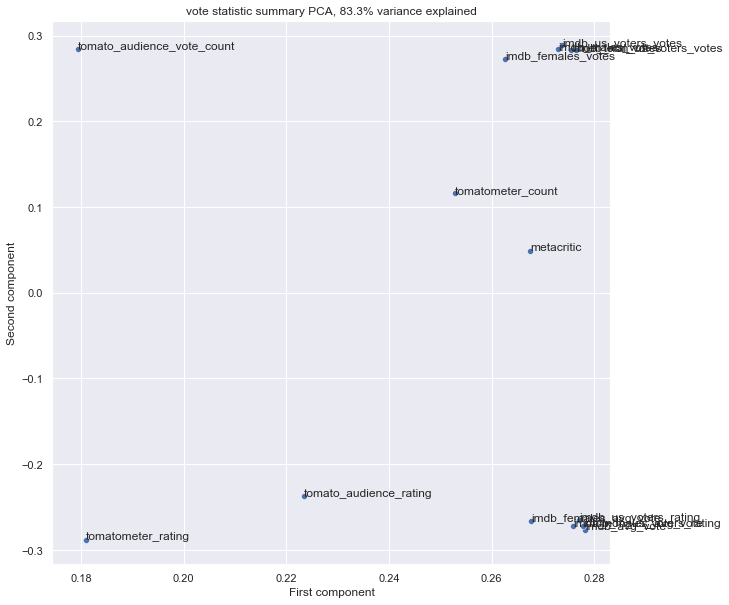

In [300]:
_ = sns.scatterplot(x=loadings_df.PC1,y=loadings_df.PC2,data=loadings_df)
for s, x, y in zip(loadings_df.index, loadings_df.PC1, loadings_df.PC2):
    plt.annotate(s, (x, y))
_ = plt.xlabel('First component')
_ = plt.ylabel('Second component')
_ = plt.title(f'vote statistic summary PCA, {var:.1f}% variance explained')

This plot shows that 2 group of varible have a same participation to data varience and we can pick one for the modeling. there are two group that have this close relation, __Male Vote average, US and non-US vote average__ are in the first group and  __Male vote count, US and non-US vote count__ are in the secound group. To __eliminate redundant features__, we can just pick Male vote information and disregard the US and non_Us information.

now let's plot a __heatmap__ to see the __corrolation__ between the predictor and the dependant value of the dataset.

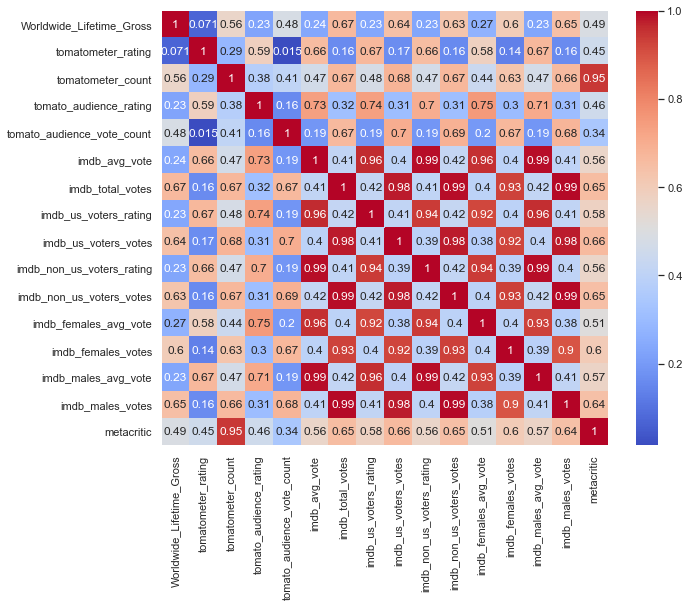

In [160]:

_ = sns.heatmap(movie.corr(),cmap='coolwarm', annot=True)

### 3. Weighting the vote avg with vote count:
***

Like it showed in the scatter plot the __vote avg seems has no relation with the movie gross__. let's try to see if __weighting each vote avg value with its corresponding vote count__ can make the vote avg more usable for the model.

I use ratio of the each vote count multiple by the vote avg for this perpose, and make a score for each data.


In [220]:
movie_comb = pd.DataFrame()
movie_comb['Worldwide_Lifetime_Gross'] = movie.Worldwide_Lifetime_Gross
movie_comb['tomatometer_score'] = (movie.tomatometer_count/np.max(movie.tomatometer_count)) * movie.tomatometer_rating
movie_comb['tomato_audience_score'] = (movie.tomato_audience_vote_count/np.max(movie.tomato_audience_vote_count)) * movie.tomato_audience_rating
movie_comb['imdb_score'] = (movie.imdb_total_votes/np.max(movie.imdb_total_votes)) * movie.imdb_avg_vote
movie_comb['imdb_us_score']=(movie.imdb_us_voters_votes/np.max(movie.imdb_us_voters_votes)) * movie.imdb_us_voters_rating
movie_comb['imdb_non_us_score']=(movie.imdb_non_us_voters_votes/np.max(movie.imdb_non_us_voters_votes))*movie.imdb_non_us_voters_rating
movie_comb['imdb_females_score']=(movie.imdb_females_votes/np.max(movie.imdb_females_votes)) * movie.imdb_females_votes
movie_comb['imdb_males_score'] = (movie.imdb_males_votes/np.max(movie.imdb_males_votes)) * movie.imdb_males_avg_vote
movie_comb['metacritic_score'] = (movie.tomatometer_count/np.max(movie.tomatometer_count)) * movie.metacritic
movie_comb['class'] = movie['class']
movie_comb.head(3)

,Worldwide_Lifetime_Gross,tomatometer_score,tomato_audience_score,imdb_score,imdb_us_score,imdb_non_us_score,imdb_females_score,imdb_males_score,metacritic_score,class
0,62832209,11.320557,0.248638,2.067585,1.950729,2.206363,649.637387,1.838280,4.260001,Average
1,428028233,24.433798,0.290463,4.198970,4.243480,4.107803,673.007284,4.204916,10.328901,Average
2,225973340,24.585366,0.620494,5.113500,4.517182,5.546982,1176.717870,5.388446,13.379536,Average


How about doing the same scatterplot again now with the wighted vote avg values.

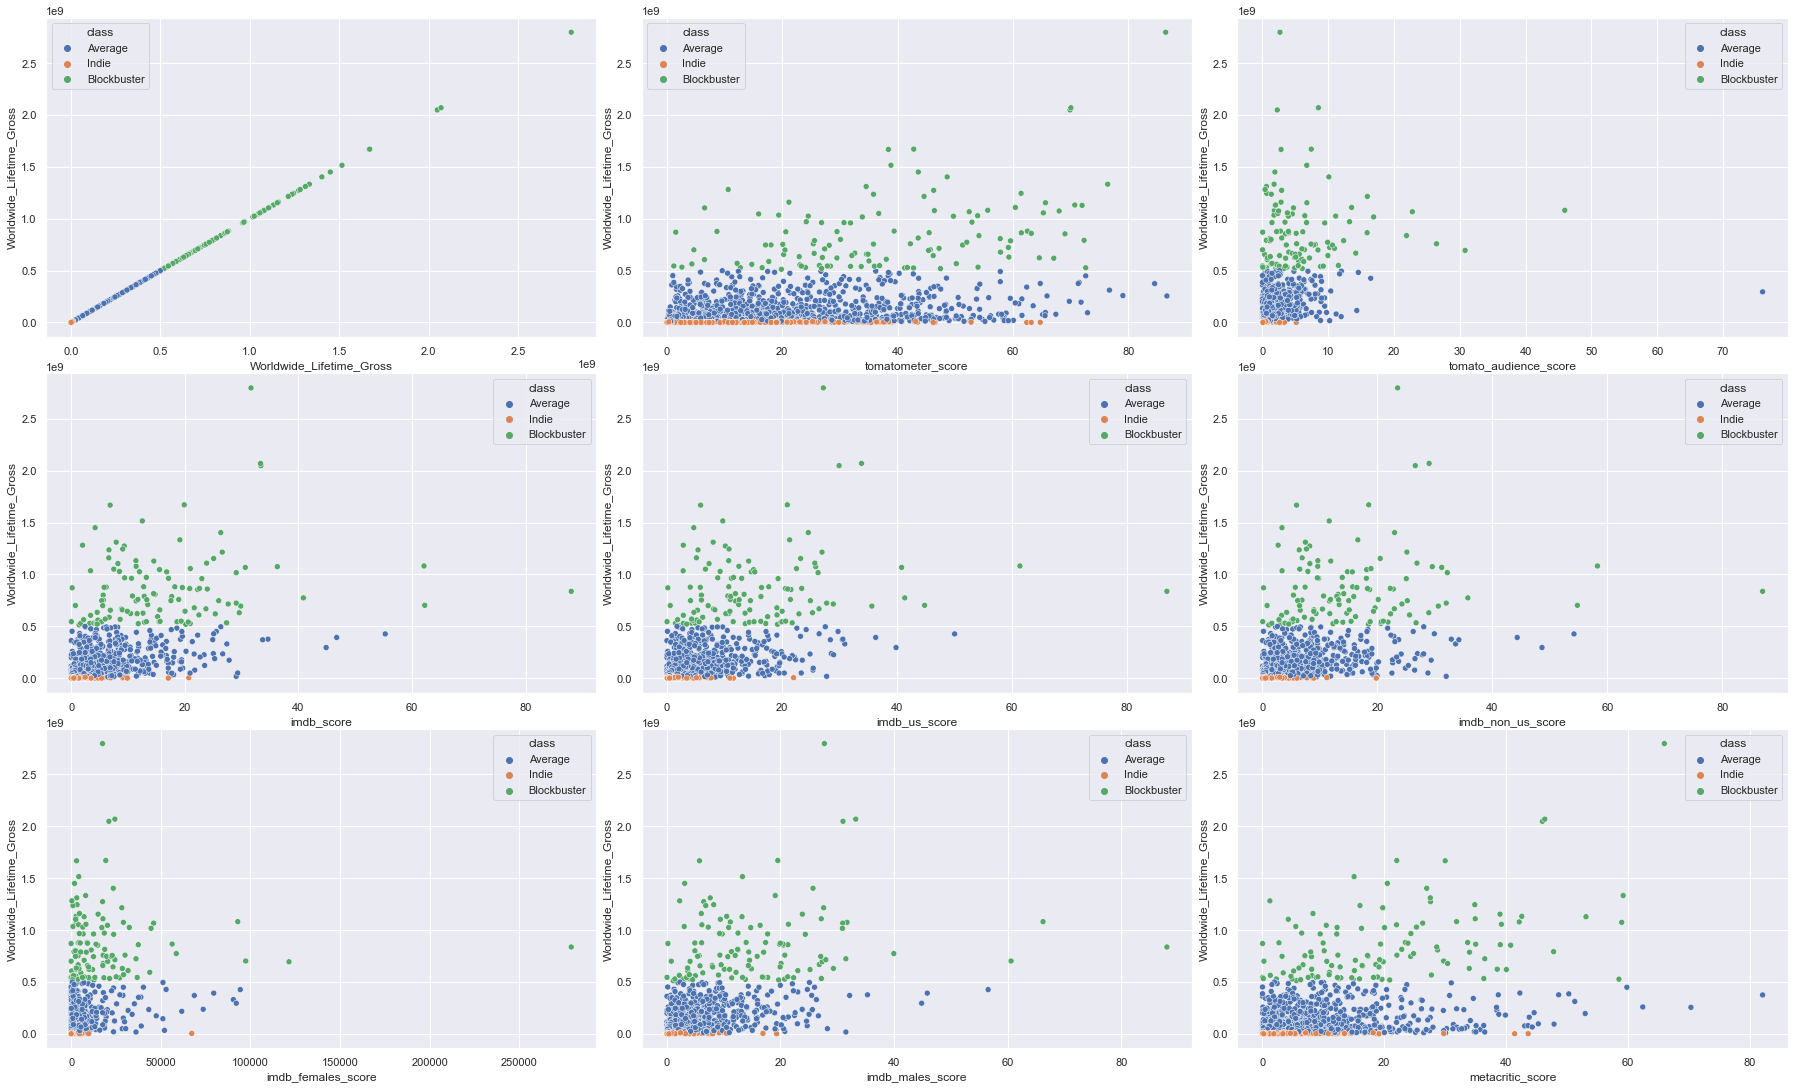

In [221]:
col = movie_comb.columns
col.drop('class')
fig, axes = plt.subplots(3,3, figsize=(25,15))
fig.tight_layout()
for i, ax in zip(col, axes.flat):
         _ = sns.scatterplot(ax=ax,x=i,y= 'Worldwide_Lifetime_Gross',data=movie_comb,hue='class')

seems has a better connection now, but the avg and count information now are look too similar to eachother.lets check the PCA.

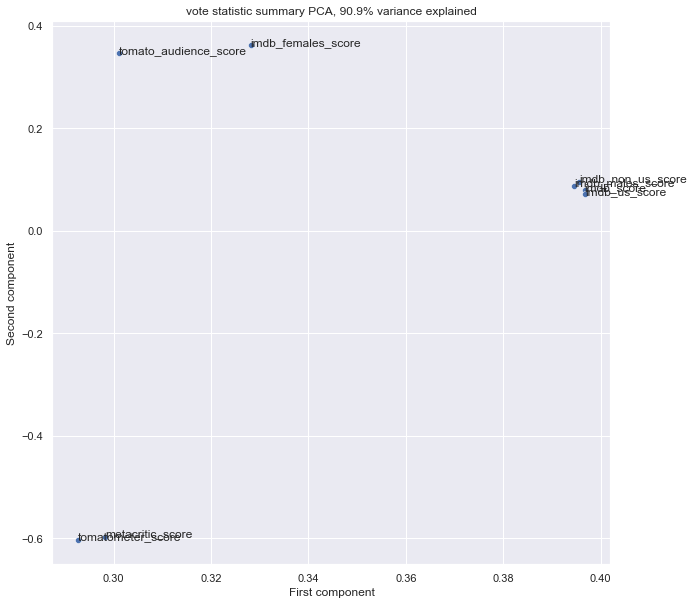

In [223]:
movie2 = movie_comb.drop(columns=['Worldwide_Lifetime_Gross','class'])
movie_scale = scale(movie2)
columns_scale = movie2.columns
movie_scale_df = pd.DataFrame(movie_scale, columns=(columns_scale))
movie_PCA = PCA().fit(movie_scale_df)
var = 100 * movie_PCA.explained_variance_ratio_.cumsum()[1]
_ = sns.scatterplot(x=movie_PCA.components_[0],y=movie_PCA.components_[1],data=movie_PCA)
for s, x, y in zip(columns_scale, movie_PCA.components_[0], movie_PCA.components_[1]):
    plt.annotate(s, (x, y))
_ = plt.xlabel('First component')
_ = plt.ylabel('Second component')
_ = plt.title(f'vote statistic summary PCA, {var:.1f}% variance explained')

the weigting seems doesn't help the varrience of the data and just make the predictor values cluster together more and there is less varity in data varience.

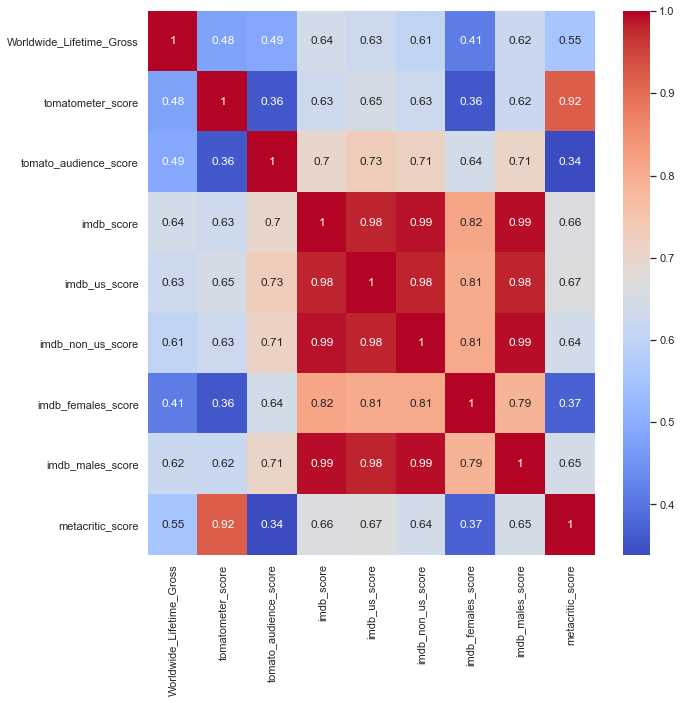

In [224]:
_ = sns.heatmap(movie_comb.corr(),cmap='coolwarm', annot=True)